**BanK Marketting**

**Name:** Ansu Issac

**Organization:** Entri Elevate

**Date:** 18/12/2024


1. **Overview of Problem Statement:**
  For marketing purposes, banks contact a lot of clients for promotion in term deposit subscriptions. Here, the aim of making a prediction is when the client will subscribe or not for a term deposit basis (y = yes/no). Using predictive modeling makes the bank identify the most suitable clients, optimize strategies of marketing, minimize direct operating costs, and get good campaign effectiveness. Key challenges associated with this include class imbalance management, handling missing or "unknown" values, and interpreting influential factors for better decision-making.

  

2. **Objective:**

  The classification goal is to predict if the client will subscribe a term deposit.
3. **Data Description:**

- Source: https://archive.ics.uci.edu/dataset/222/bank+marketing
- Features: age,job	,marital,	education,	default,	balance,	housing,	loan	contact,	day,	month,	duration,	campaign,	pdays,	previous,	poutcome,	y(term deposit)


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, SelectFromModel

**Data Collection**

In [146]:
Bank_data=pd.read_csv('bank-full.csv',sep=';')
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [147]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [148]:
Bank_data.shape

(45211, 17)

In [149]:
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Data Preprosesing**

In [150]:
Bank_data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [151]:
Bank_data.duplicated().sum()

0

In [152]:
for column in Bank_data.select_dtypes(include=['object']).columns:
  print(f"Unique values in {column}:")
  print(Bank_data[column].unique())
  print()

Unique values in job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in marital:
['married' 'single' 'divorced']

Unique values in education:
['tertiary' 'secondary' 'unknown' 'primary']

Unique values in default:
['no' 'yes']

Unique values in housing:
['yes' 'no']

Unique values in loan:
['no' 'yes']

Unique values in contact:
['unknown' 'cellular' 'telephone']

Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in poutcome:
['unknown' 'failure' 'other' 'success']

Unique values in y:
['no' 'yes']



In [153]:
columns_to_check = ['job', 'education', 'poutcome','contact']

unknown_counts = {}
for col in columns_to_check:
    unknown_counts[col] = Bank_data[col].value_counts().get('unknown', 0)

print("Count of 'unknown' values in each column:", unknown_counts)


Count of 'unknown' values in each column: {'job': 288, 'education': 1857, 'poutcome': 36959, 'contact': 13020}


In [154]:
# Drop columns with excessive Unknown values
Bank_data.drop('contact',axis=1,inplace=True)
Bank_data.drop('poutcome',axis=1,inplace=True)
Bank_data=Bank_data[Bank_data['education'] !='unknown']
Bank_data=Bank_data[Bank_data['job'] !='unknown']

In [155]:
Bank_data.shape

(43193, 15)

In [156]:
Bank_data.value_counts('y')

,count
y,
no,38172
yes,5021


In [157]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
Bank_data['month'] = Bank_data['month'].map(month_mapping)

In [158]:
numeric_columns = Bank_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = Bank_data.select_dtypes(include=['object']).columns

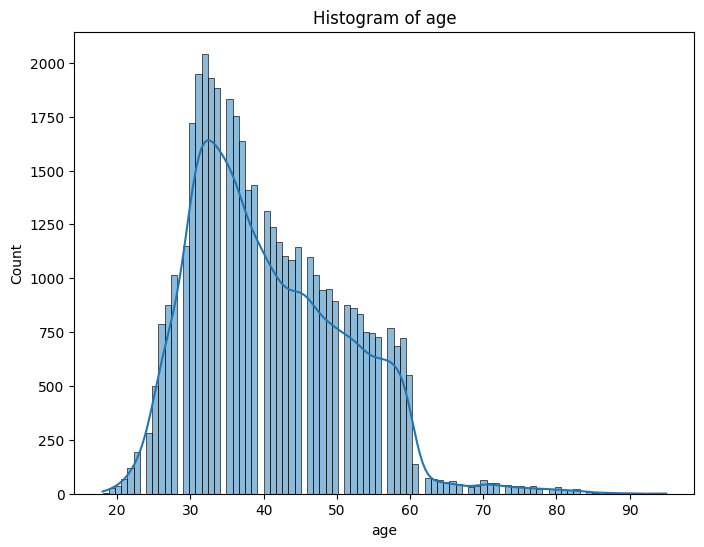

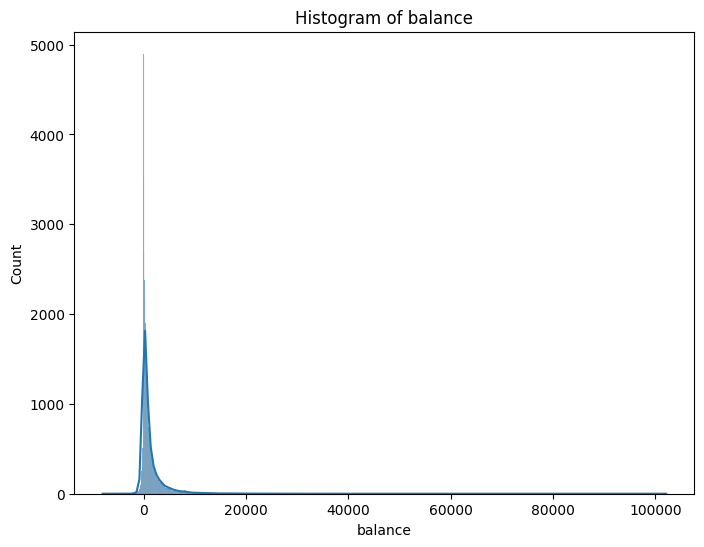

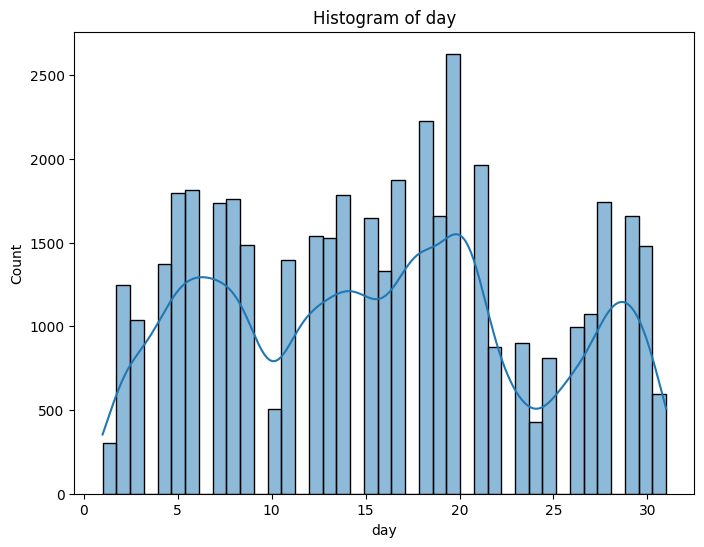

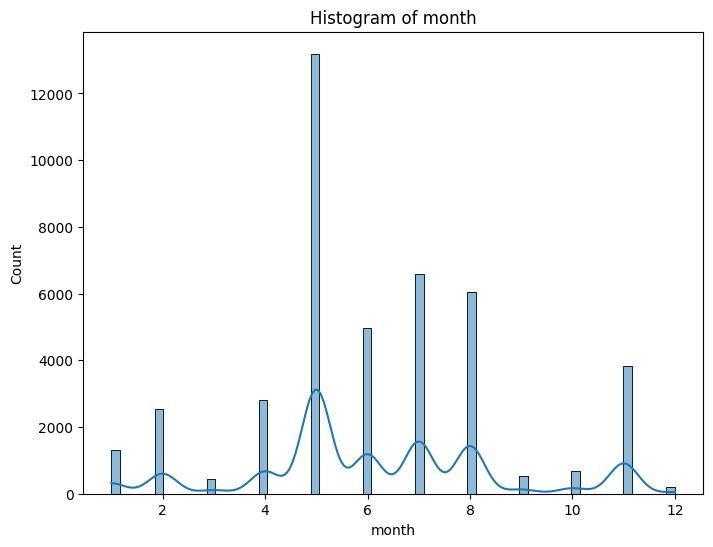

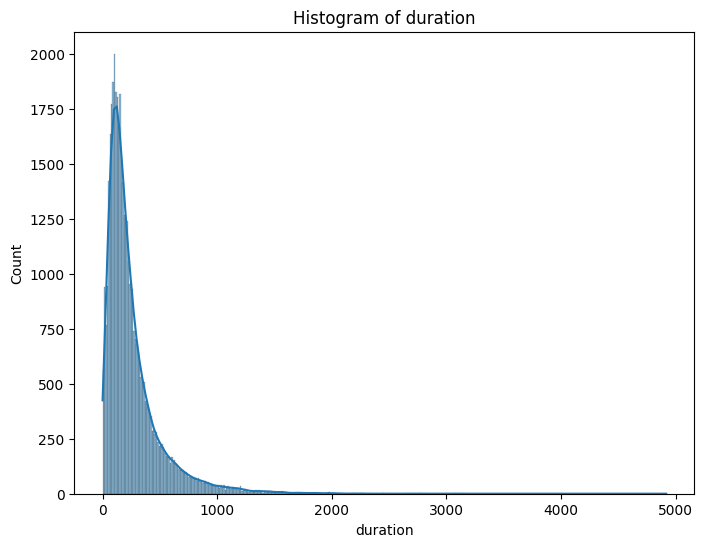

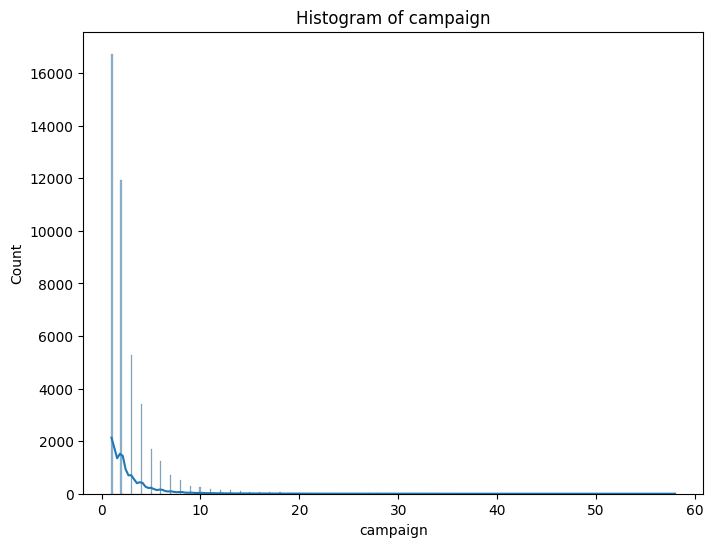

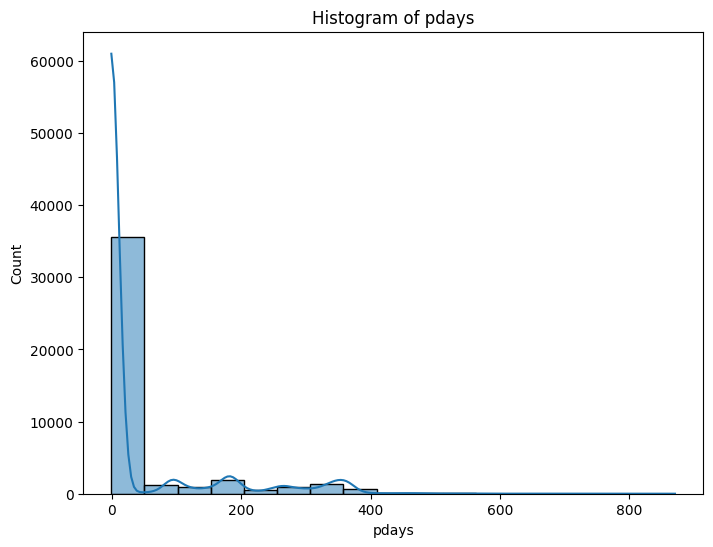

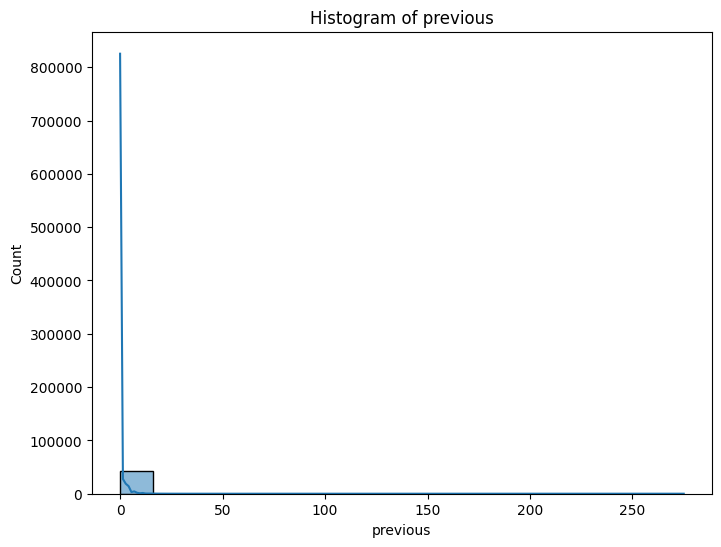

In [159]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(Bank_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

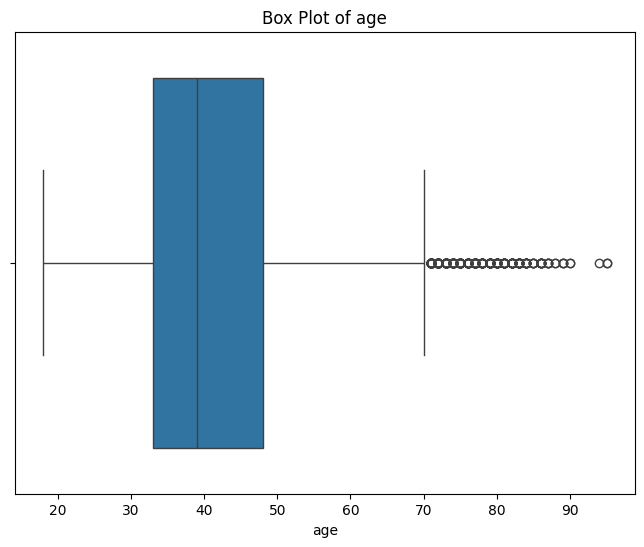

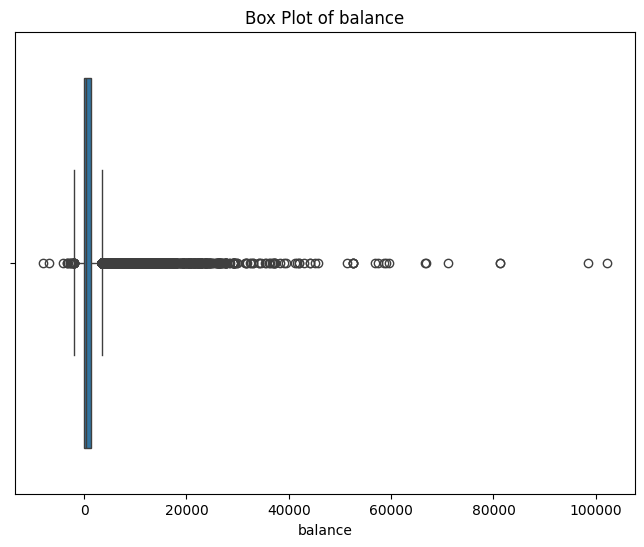

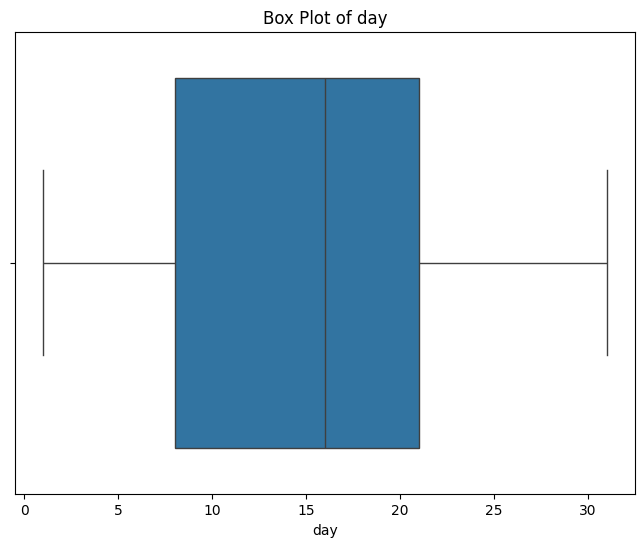

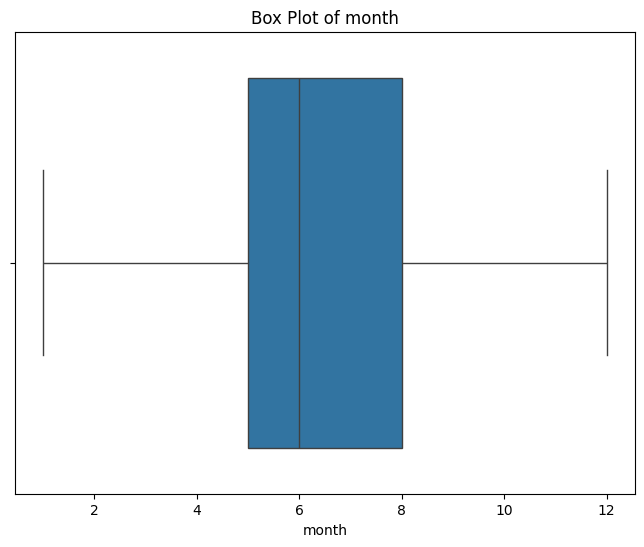

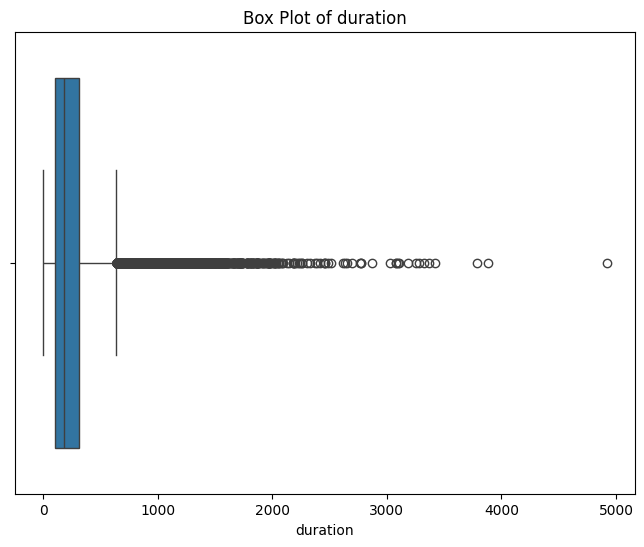

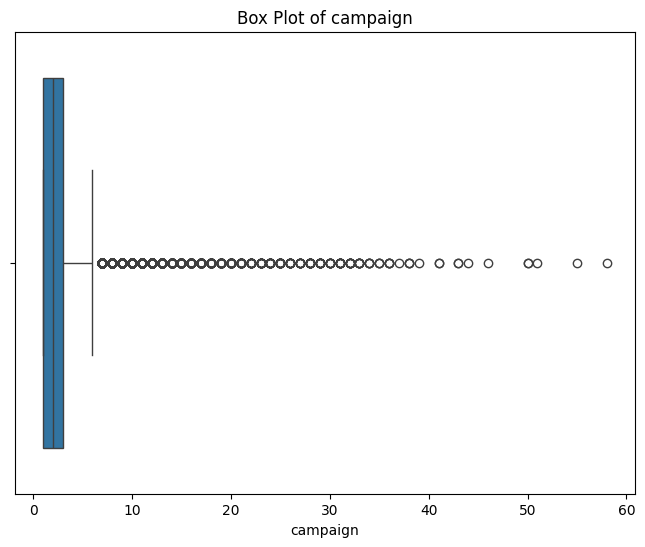

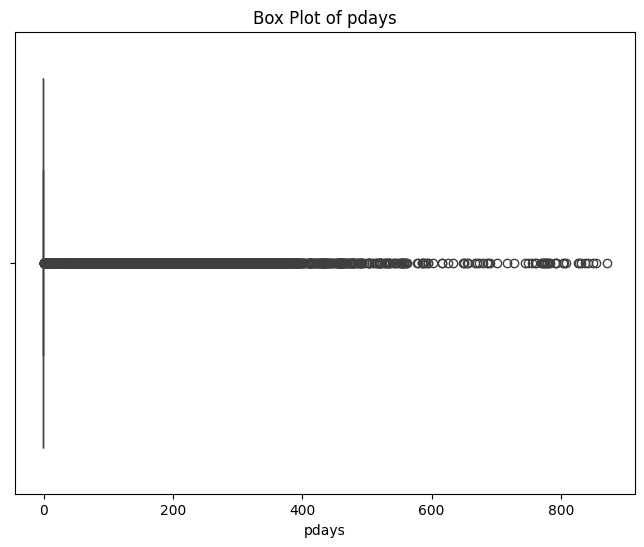

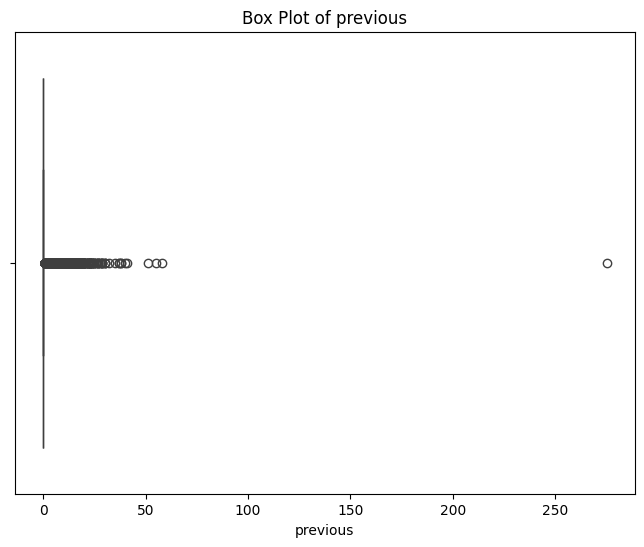

In [160]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Bank_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

Outliers Handling

In [161]:
def handle_outliers(df):
  for column in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
  return df

In [162]:
handle_outliers(Bank_data)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,5,5,261.0,1.0,-1.0,0.0,no
1,44.0,technician,single,secondary,no,29.0,yes,no,5,5,151.0,1.0,-1.0,0.0,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,5,5,76.0,1.0,-1.0,0.0,no
5,35.0,management,married,tertiary,no,231.0,yes,no,5,5,139.0,1.0,-1.0,0.0,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,5,5,217.0,1.0,-1.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,17,11,640.5,3.0,-1.0,0.0,yes
45207,70.5,retired,divorced,primary,no,1729.0,no,no,17,11,456.0,2.0,-1.0,0.0,yes
45208,70.5,retired,married,secondary,no,3423.5,no,no,17,11,640.5,5.0,-1.0,0.0,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,17,11,508.0,4.0,-1.0,0.0,no


In [163]:
for col in categorical_columns:
    le = LabelEncoder()
    Bank_data[col] = le.fit_transform(Bank_data[col])

In [164]:
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58.0,4,1,2,0,2143.0,1,0,5,5,261.0,1.0,-1.0,0.0,0
1,44.0,9,2,1,0,29.0,1,0,5,5,151.0,1.0,-1.0,0.0,0
2,33.0,2,1,1,0,2.0,1,1,5,5,76.0,1.0,-1.0,0.0,0
5,35.0,4,1,2,0,231.0,1,0,5,5,139.0,1.0,-1.0,0.0,0
6,28.0,4,2,2,0,447.0,1,1,5,5,217.0,1.0,-1.0,0.0,0


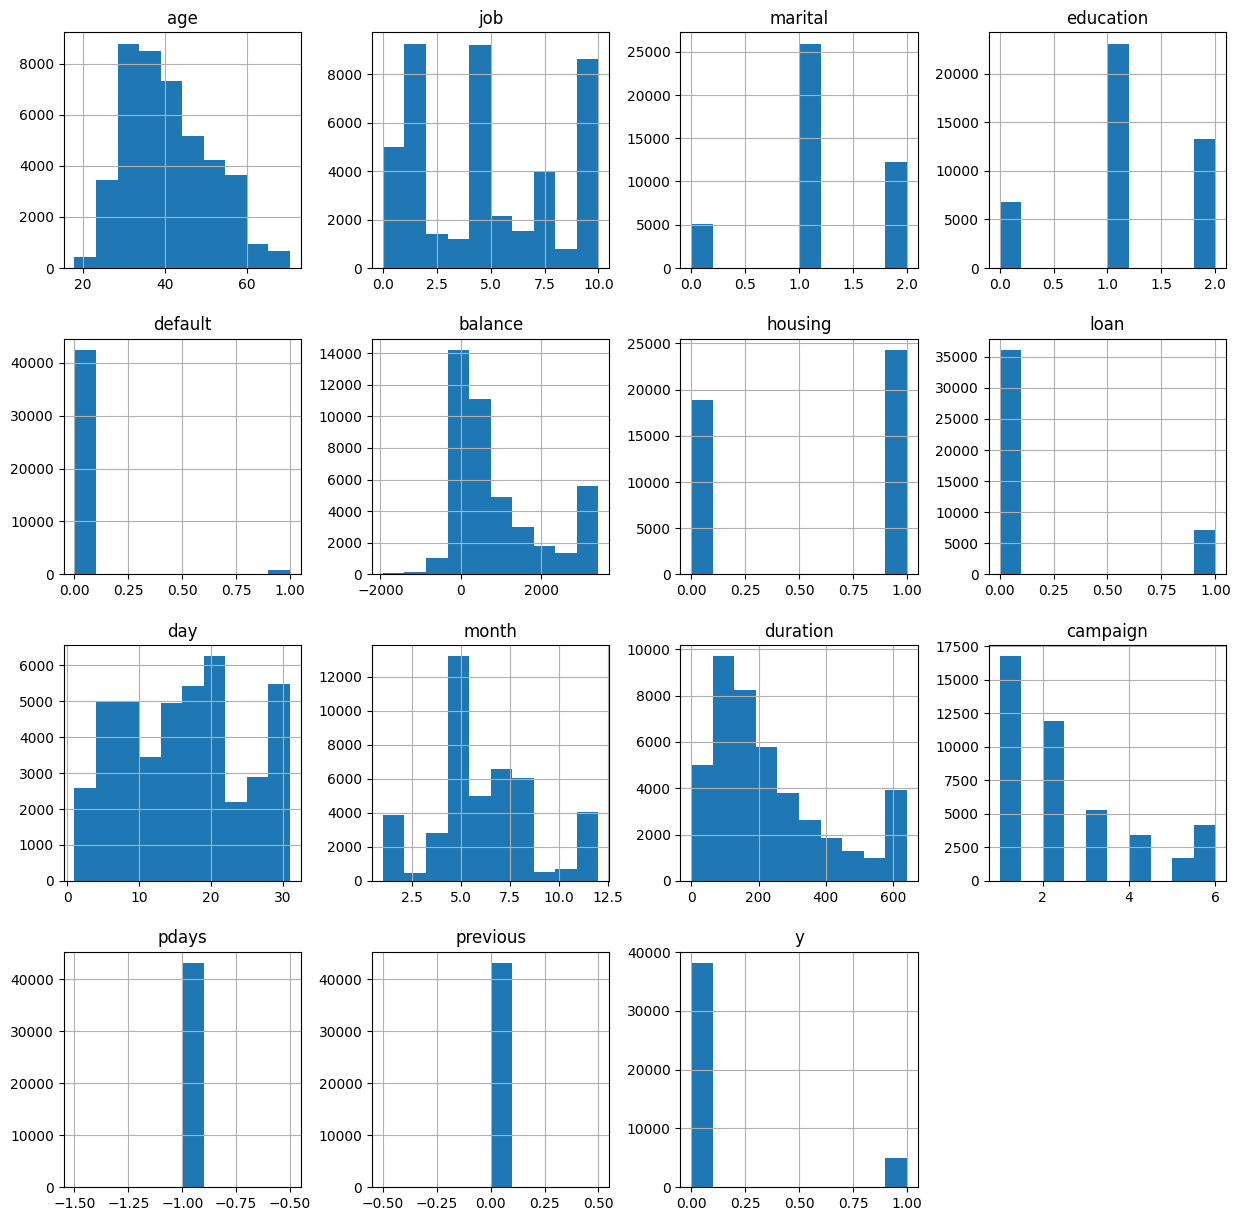

In [165]:
Bank_data.hist(figsize=(15, 15))
plt.show()

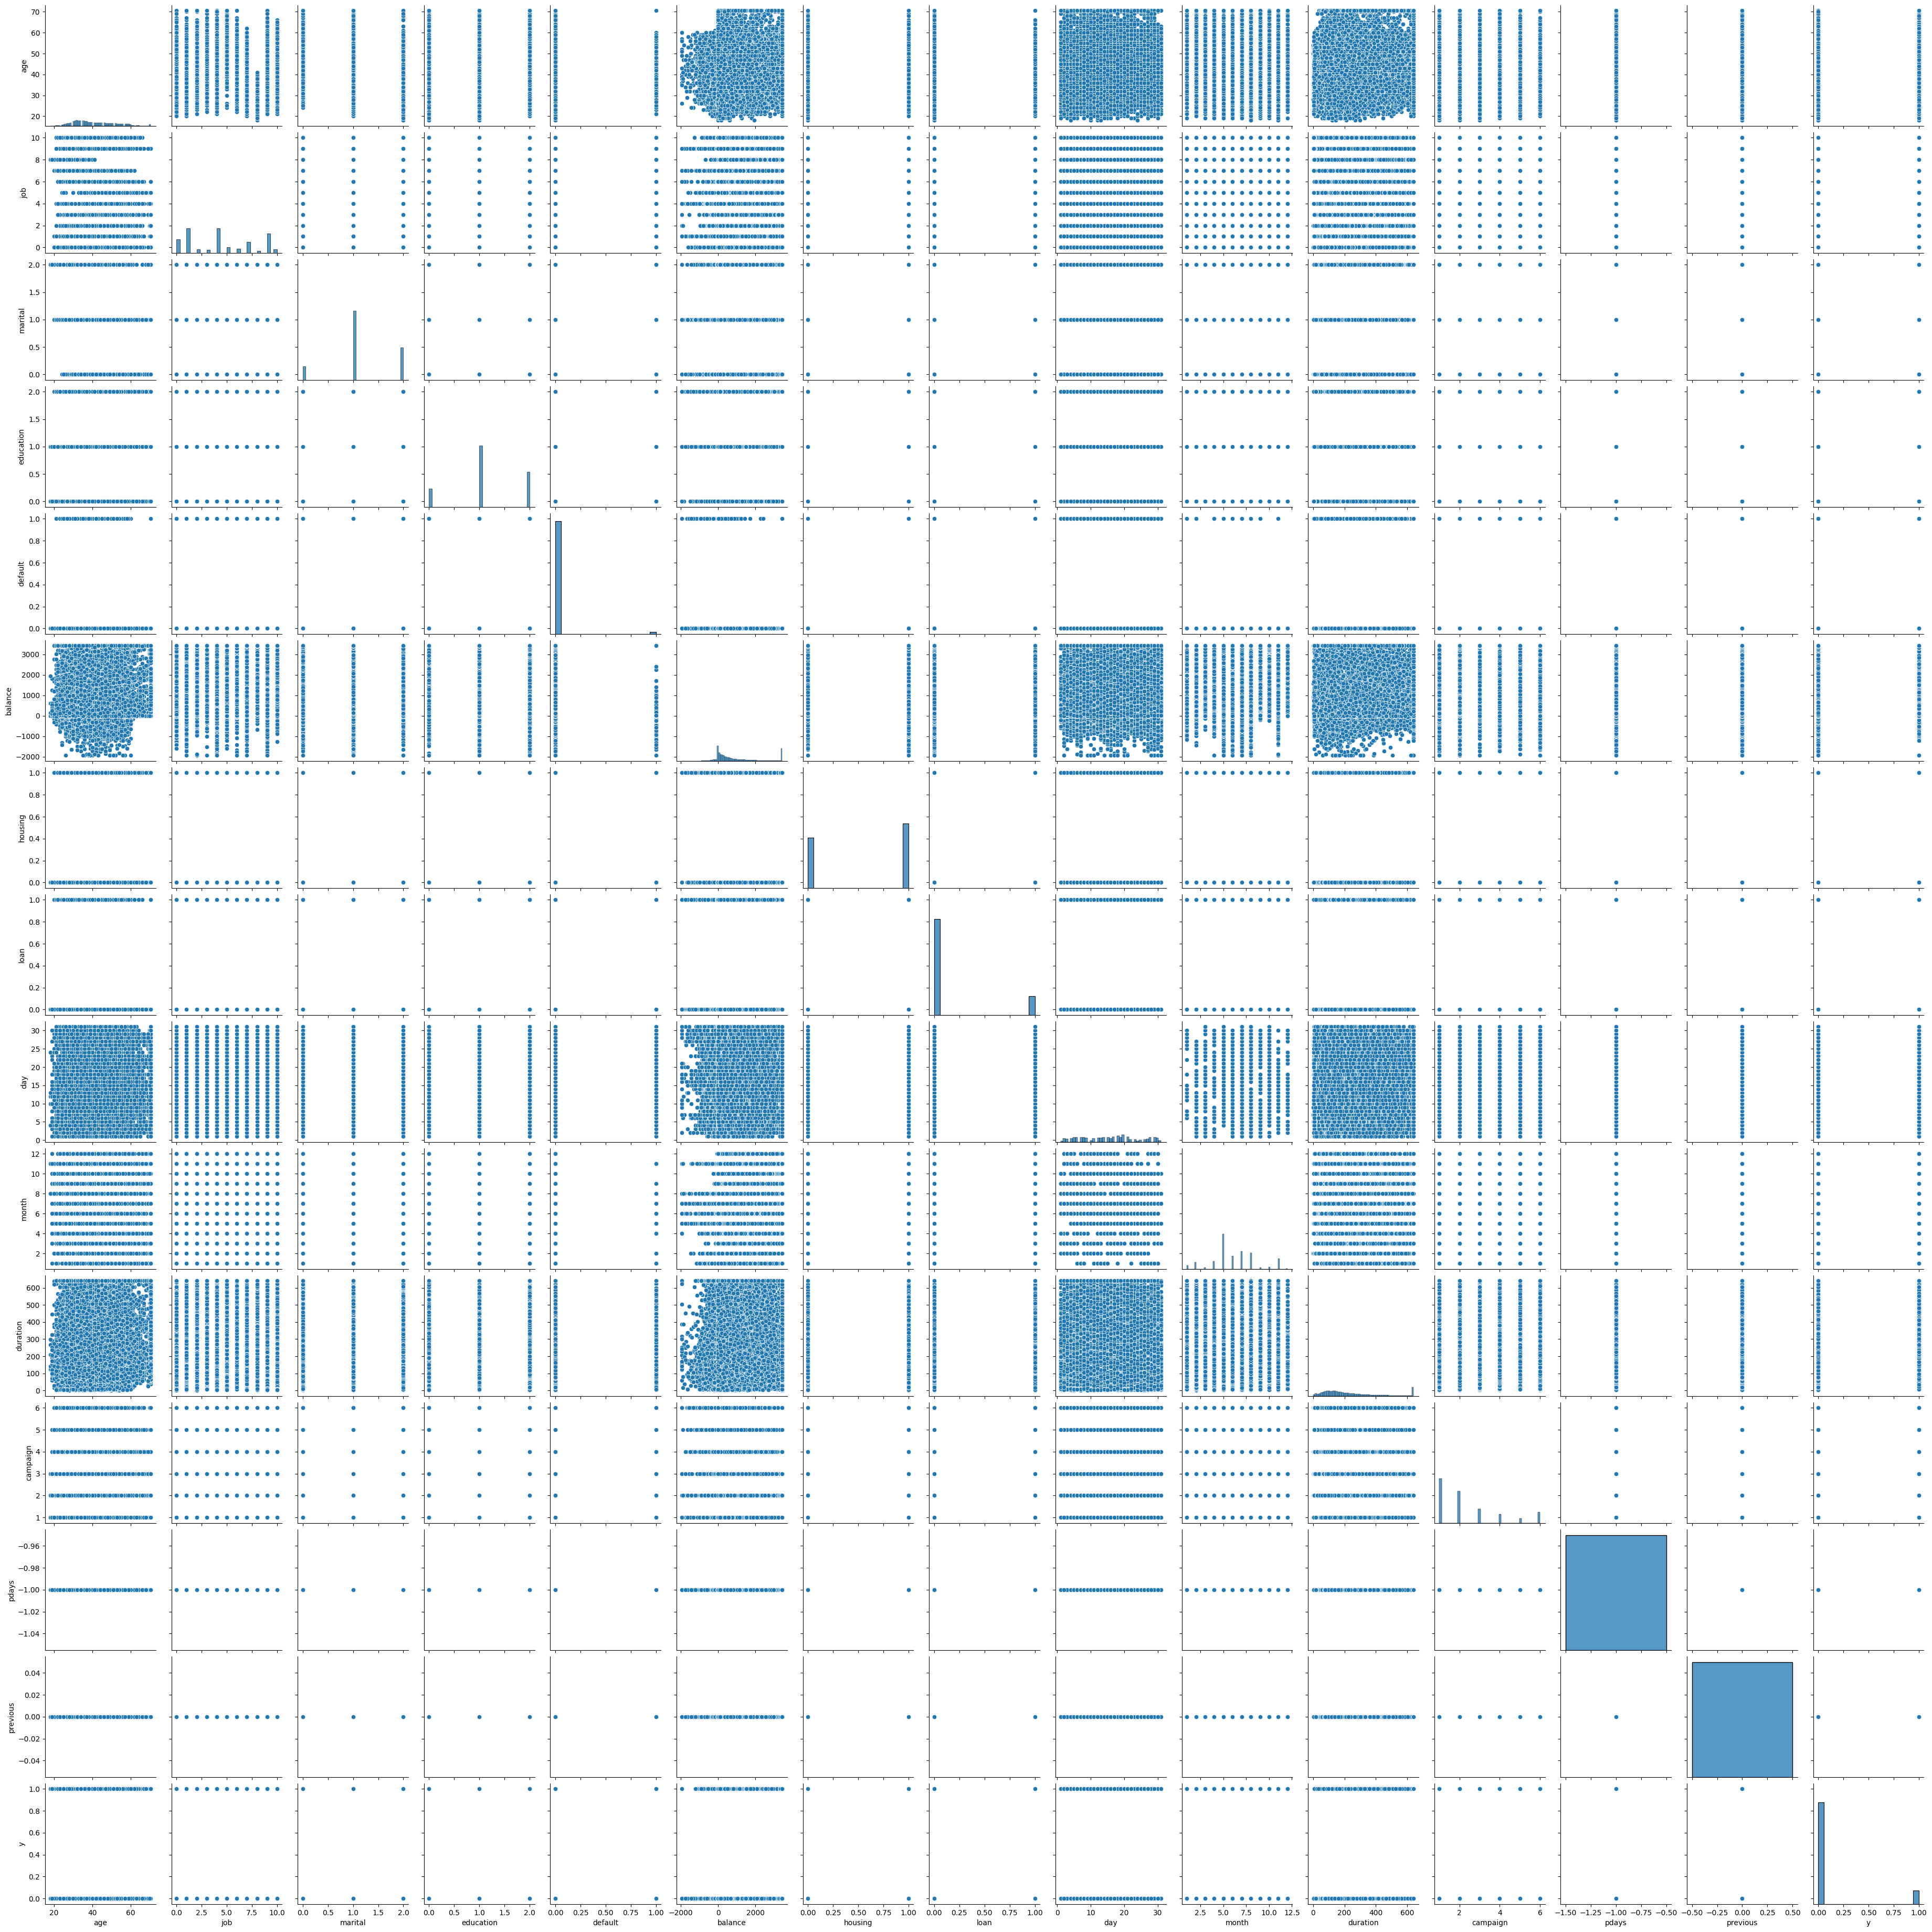

In [166]:
sns.pairplot(Bank_data)
plt.show()

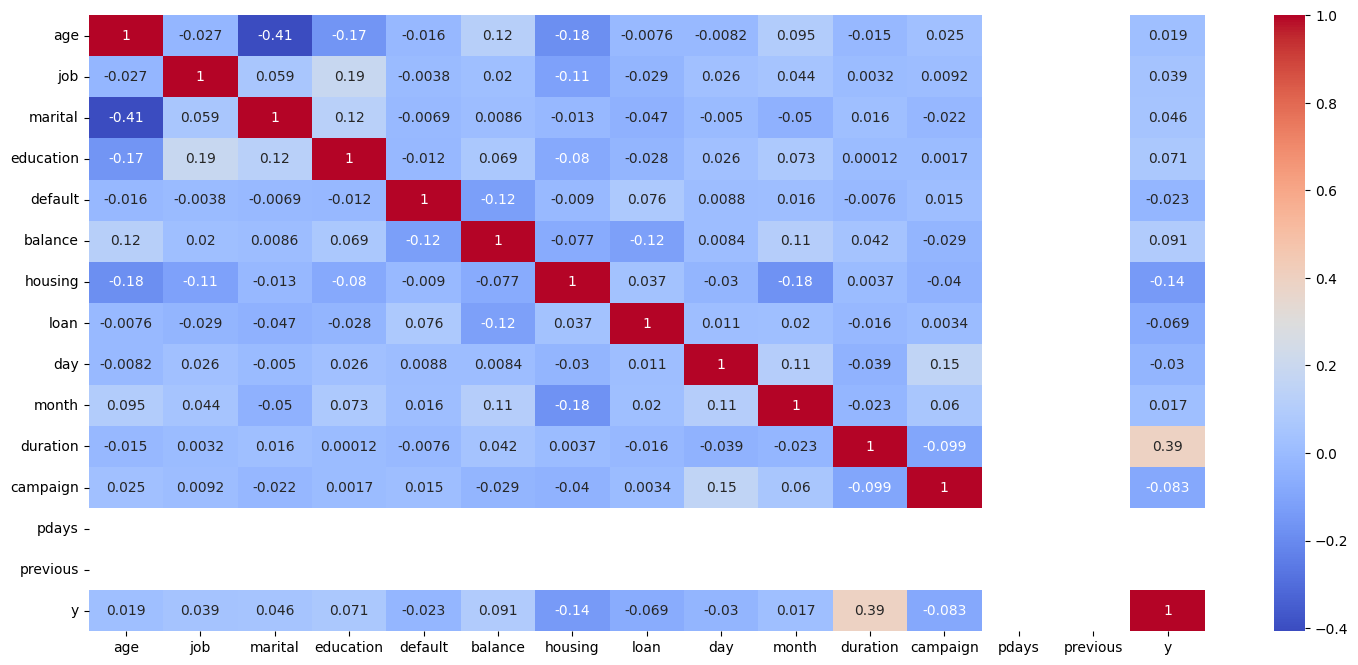

In [167]:
plt.figure(figsize=(18, 8))
sns.heatmap(Bank_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [168]:
Bank_data.value_counts('y')

,count
y,
0,38172
1,5021


**Spiting Datast For Training and Testing**

In [215]:
data={
    'age':Bank_data['age'],
    'job':Bank_data['job'],
    'balance':Bank_data['balance'],
    'duration':Bank_data['duration'],
    'campaign':Bank_data['campaign'],
    'housing':Bank_data['housing'],
    'loan':Bank_data['loan'],
    'y':Bank_data['y']
}




In [216]:
df=pd.DataFrame(data)
df

,age,job,balance,duration,campaign,housing,loan,y
0,58.0,4,2143.0,261.0,1.0,1,0,0
1,44.0,9,29.0,151.0,1.0,1,0,0
2,33.0,2,2.0,76.0,1.0,1,1,0
5,35.0,4,231.0,139.0,1.0,1,0,0
6,28.0,4,447.0,217.0,1.0,1,1,0
...,...,...,...,...,...,...,...,...
45206,51.0,9,825.0,640.5,3.0,0,0,1
45207,70.5,5,1729.0,456.0,2.0,0,0,1
45208,70.5,5,3423.5,640.5,5.0,0,0,1
45209,57.0,1,668.0,508.0,4.0,0,0,0


In [218]:
x=df.drop('y',axis=1)
y=df['y']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Feature Selection**

In [219]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [220]:
importance=rf.feature_importances_
features_selection=pd.DataFrame(importance,index=x_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [221]:
features_selection

,importance
duration,0.372728
balance,0.247397
age,0.211237
job,0.081358
campaign,0.050411
housing,0.024326
loan,0.012541


In [222]:
feather_selector=SelectFromModel(rf,max_features=7)
feather_selector.fit(x_train,y_train)
feature_selection=feather_selector.get_support()

In [223]:
Selected_features=x_train.columns[feature_selection]
Selected_features

Index(['age', 'balance', 'duration'], dtype='object')

In [224]:
x_train=x_train[Selected_features]
x_test=x_test[Selected_features]

In [225]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34554, 3)
(8639, 3)
(34554,)
(8639,)
